# 111-2 機器學習期中報告

## 比賽簡介
* 比賽名稱：Digit Recognizer
* Level：Getting started
* 比賽目的：Learn computer vision fundamentals with the famous MNIST data
* 比賽說明：利用MNIST資料集辨識大量的手寫數字圖片，讓模型能自動辨識數字

## 為什麼選擇該比賽?
因為在該課堂中學習的房價和鐵達尼號生存人數預測時，都是根據表格中的數值去產生預測，而預測結果也是數值。因此在選擇kaggle比賽時，我看到有**電腦視覺**相關的數字辨識時，便覺得能接觸其他機器學習/深度學習領域也不錯，和上課內容輸入數值和預測數值不一樣，它是輸入圖片(但學了之後發現我們也是把照片轉為矩陣數值去輸入)並產生分類。
整體來說選擇該比賽是為了嘗試機器學習在其他領域的應用。

## 資料集和目標介紹
### 資料集
* 名稱：MNIST database (全名：Modified National Institute of Standards and Technology database)
* 用途：training various image processing systems、machine learning
* 內容：一個train.csv檔用於訓練，一個test.csv檔用於預測，檔案內包含手寫0 ~ 9的灰白數字圖，圖片的長和寬各28 pixel，所以共有784個pixel於圖片中。每個pixel有數值0 ~ 255，數值越大代表顏色越深(白~黑)
    * train.csv：第一個column是label，放著照片中的數字。第2 ~ 785column放著照片 1~784個pixel中的數值
    * test.csv：檔案格式和train.csv類似，就只是把label刪去，因為是用來產生預測結果上傳的
    * sample_submission.csv：上傳至kaggle繳交時的格式範例
    
### 目標介紹
* 目標：產生test.csv檔案中28000張照片的預測結果
* 上傳格式：第一個column：照片編號，第二個column：預測數字，底下有範本：
```
ImagedId, Label
1, 3
2, 7
3, 8
```

## 實作過程

### 載入機器學習相關套件
1. pandas：載入資料成dataframe格式，進行資料處理
2. numpy：資料處理
3. matplotlib：繪製圖表
4. sklearn：機器學習實作重要套件
5. %matplotlib inline：內嵌繪圖，省略plt.show()該步驟

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm
%matplotlib inline

### 匯入深度學習會用到keras套件和其方法
1. to_categorical：將label轉成one hot格式
2. Sequential：自己手刻模型
3. keras.layers裡面的functions：手刻模型時會用到的方法
4. keras.optimizers裡面的adam：訓練模型時，設定的優化演算法，讓模型收斂更快

In [46]:
from keras.utils.np_utils import to_categorical # 將label轉成one hot
from keras.models import Sequential #手刻模型
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import adam_v2

### 載入資料
* 將training.csv讀入變數labeled_images
* images：42000張照片的pixel數值
* labels：42000張照片的label
* train_test_split方法中的training data和 validation data的切割比例這邊選擇8：2，random state則類似變更資料排序

In [47]:
labeled_images = pd.read_csv("./train.csv")
images = labeled_images.iloc[:,1:]
labels = labeled_images.iloc[:,:1]
train_images, test_images,train_labels,test_labels = train_test_split(images, labels, 
train_size=0.8, random_state=10) 

取出照片中編號為1的照片看看，因為取出的照片是一維的資料格式，要用reshape轉成二維才能轉成圖片

Text(0.5, 1.0, '7')

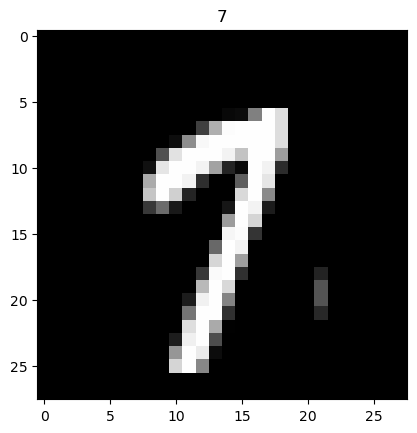

In [48]:
i = 1
img = train_images.iloc[i].values#將DF轉成數值
img = img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.title(train_labels.iloc[i,0])

查看image的pixel value的分布情況，如題目所述介於0 ~ 255之間

(array([683.,  11.,   4.,   5.,   3.,   6.,   7.,   3.,  13.,  49.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

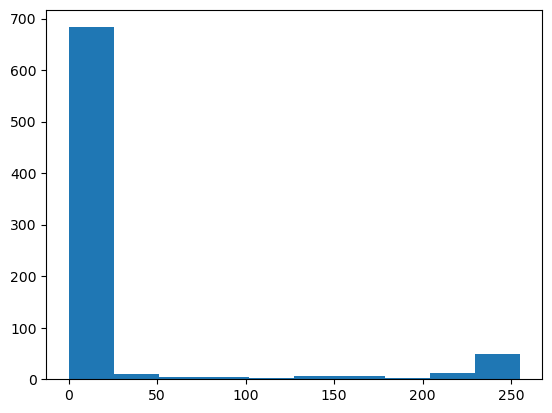

In [49]:
plt.hist(train_images.iloc[i])

看一下這個等等進行training時的train_labels.values.ravel()在做什麼，發現是將train_labels轉成
array後再轉成一維數值。
* .values：將dataframe格式轉為數值
* .ravel()：將數值改為一維格式

In [50]:
print(train_labels.values)
print(train_labels.values.ravel())

[[4]
 [7]
 [7]
 ...
 [5]
 [6]
 [0]]
[4 7 7 ... 5 6 0]


## 模型訓練
### 利用SVM支援向量機進行訓練
因為要進行分類的關係，所以我選擇使用SVM(Support Vector Machine)進行分類訓練，SVM的概念是訓練產生**超平面**將不同類別的資料分類，是機器學習中分類常用的演算法。如果想要了解更多可以去看[這篇](https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC3-4%E8%AC%9B-%E6%94%AF%E6%8F%B4%E5%90%91%E9%87%8F%E6%A9%9F-support-vector-machine-%E4%BB%8B%E7%B4%B9-9c6c6925856b)文章。

In [51]:
svm_clf = svm.SVC()
svm_clf.fit(train_images, train_labels.values.ravel())
svm_clf.score(test_images,test_labels.values.ravel())

0.9757142857142858

若沒對照片做處理可以得到約0.9757的準確度

## 對照片做前處理
剛剛的預測並沒有對照片進行任何處理，因此接下來我們試試看兩種處理方式，看能不能讓預測更加準確。

首先將training data和validation data各複製兩份(這是我個人習慣，會留下原本的資料變數，複製兩份是因為有兩種前處理)，方便等一下進行前處理。

In [52]:
test_images_1 = test_images.copy(deep=True)
train_images_1 = train_images.copy(deep=True)
test_images_2 = test_images.copy(deep=True)
train_images_2 = train_images.copy(deep=True)

### pixel value改為0、1
原本照片的pixel value介於0 ~ 255之間，這邊我嘗試降低照片的複雜度，如果pixel value > 0設為1，pixel value = 0則設為0。

Text(0.5, 1.0, '7')

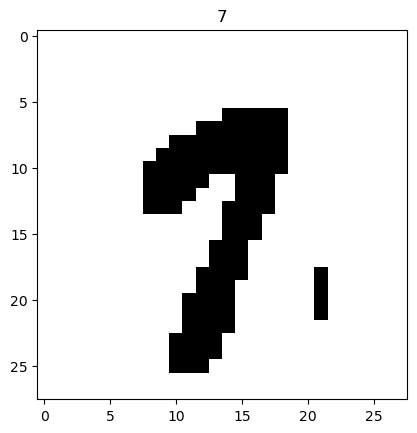

In [53]:
#pixel只要>0全部改成1
test_images_1[test_images_1>0]=1
train_images_1[train_images_1>0]=1

#印出圖片看看
img=train_images_1.iloc[i].values.reshape((28,28))
plt.imshow(img,cmap='binary')
plt.title(train_labels.iloc[i,0])

可以看到上圖數字只剩下黑白兩種顏色，接著底下我們查看pixel value分布，目前只剩下0和1

(array([674.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 110.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

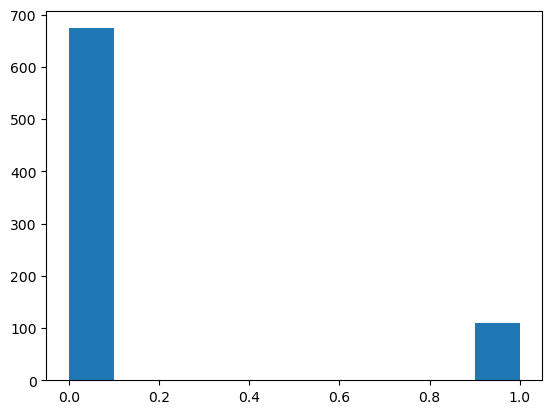

In [54]:
plt.hist(train_images_1.iloc[i])

和上方一樣將image丟入SVM進行訓練並預測，只是要注意丟入的images是經過處理的

In [55]:
svm_clf_2 = svm.SVC()
svm_clf_2.fit(train_images_1, train_labels.values.ravel())
svm_clf_2.score(test_images_1,test_labels)

0.9707142857142858

最後出來的準確度約：**0.9707**，並未比用原圖的訓練結果還好，或許是因為將資料改成只有0和1將複雜度一次降低太多了，底下將嘗試另一種前處理方法。

### 將pixel改為介於0 ~ 1之間
這學期在上另外一堂深度學習的選修課時有發現到，會將照片在輸入訓練前除以255，據說是加速模型收斂的速度，因此以下我將採用該方法來看效果如何。

將資料的pixel value除以255，並印出一張照片看看

Text(0.5, 1.0, '7')

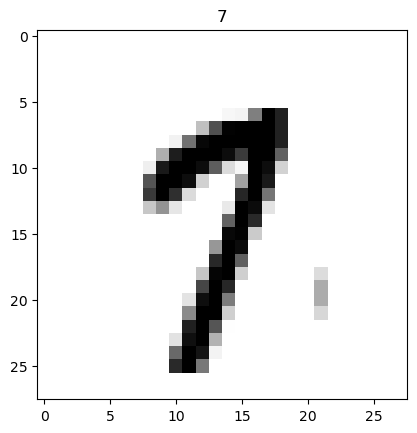

In [56]:
test_images_2 = test_images_2/255
train_images_2 = train_images_2/255

img=train_images_2.iloc[i].values.reshape((28,28))
plt.imshow(img,cmap='gist_yarg')
plt.title(train_labels.iloc[i,0])

查看pixel value是否介於0 ~ 1之間

(array([683.,  11.,   4.,   5.,   3.,   6.,   7.,   3.,  13.,  49.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

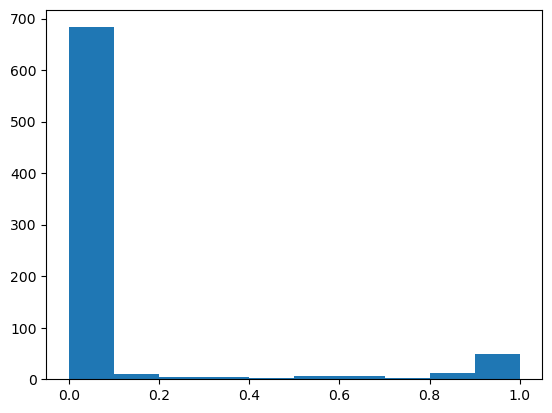

In [57]:
plt.hist(train_images_2.iloc[i])

將資料丟入SVM模型進行訓練

In [16]:
svm_clf_3 = svm.SVC()
svm_clf_3.fit(train_images_2, train_labels.values.ravel())
svm_clf_3.score(test_images_2,test_labels)

0.9757142857142858

## 產出競賽要求的檔案格式

產生對test資料集的預測label，這邊選擇第二種前處理方法除以255的model來進行預測

In [58]:
test_data = pd.read_csv("./test.csv")
test_data_1 = test_data.copy(deep=True)
test_data_1 = test_data_1/255
results = svm_clf_3.predict(test_data_1[0:28000])
results

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

將預測轉為競賽要求格式後匯出成csv檔

In [59]:
df = pd.DataFrame(results)
df.index.name='ImageId'
df.index+=1
df.columns=['Label']
df.to_csv('./results_1.csv', header=True)

## 競賽結果
上傳至kaggle之後的結果
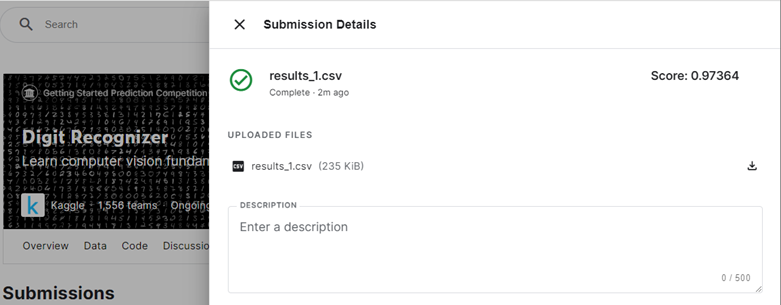

## 前一個方法中我們使用了較簡單的機器學習中的SVM分類器，接下來將試試深度學習中的CNN模型進行訓練。作法參考自kaggle [Welcome to deep learning](https://www.kaggle.com/code/toregil/welcome-to-deep-learning-cnn-99)

### 匯入資料並進行前處理
從原本的train data和test data各複製一份

In [60]:
test_images_3 = test_images.copy(deep=True)
train_images_3 = train_images.copy(deep=True)

查看dataframe中的第一筆資料，上圖代表用一般方式訓練時資料是784x1(一張圖片的pixel總數)，而使用CNN是用28X28的格式去訓練

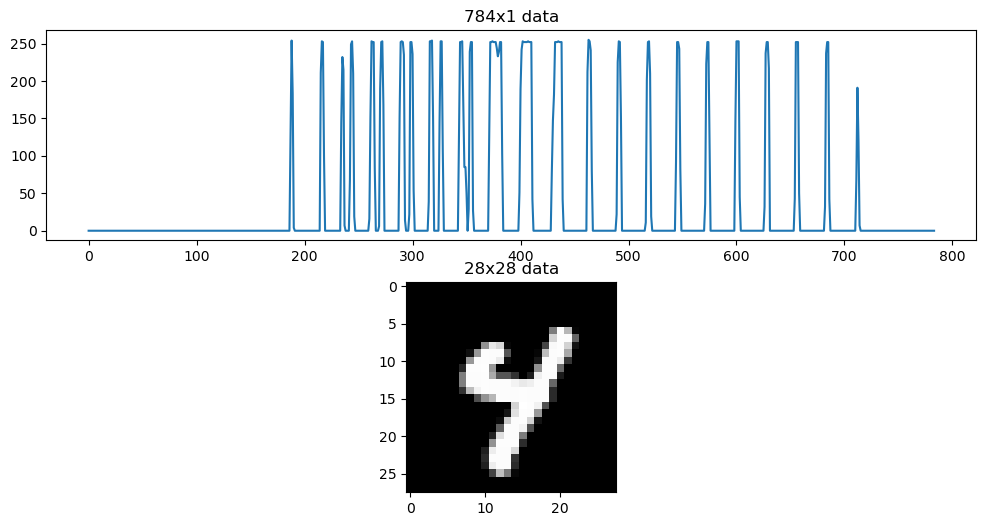

In [61]:
fig, ax = plt.subplots(2, 1, figsize=(12,6))
ax[0].plot(train_images_3.iloc[0].values)
ax[0].set_title('784x1 data')
ax[1].imshow(train_images_3.iloc[:1,:].values.reshape((28,28)), cmap='gray')
ax[1].set_title('28x28 data')
plt.show()

查看訓練集照片的維度，由33600張784個pixel的照片組成，但CNN訓練是要輸入照片加上channel，所以我們要reshape資料集，改成(照片數量, 長, 寬, channel)

In [62]:
train_images_3.shape

(33600, 784)

.reshape(-1, 28, 28, 1)中，-1代表所有training images，(28, 28)代表28x28大小的照片，最後的一是chammel，因為是灰階照片所以channel是1。

In [63]:
train_images_3 = train_images_3.values.reshape(-1, 28, 28, 1)
test_images_3 = test_images_3.values.reshape(-1, 28, 28, 1)

再檢查一下照片維度，確認調整完成

In [64]:
train_images_3.shape

(33600, 28, 28, 1)

和前面SVM訓練時的最後一個前處理方法一樣，將pixel value除以2，加速訓練收斂。

In [65]:
train_images_3 = train_images_3.astype("float32")/255
test_images_3 = test_images_3.astype("float32")/255

將training data和validation data的label轉為one hot格式

In [66]:
train_labels_oneHot = to_categorical(train_labels)
test_labels_oneHot = to_categorical(test_labels)
#印出來看看
print("train的label：",train_labels_oneHot)
print("test的label：",test_labels_oneHot)

train的label： [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
test的label： [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


### 刻劃model
雖然大致了解CNN的原理，但由於沒有手刻model的經驗，所以我套用[該篇文章](https://www.kaggle.com/code/toregil/welcome-to-deep-learning-cnn-99)中的模型，並從[這裡](https://cloud.tencent.com/developer/article/1454168)了解各function的功能
* Sequential()：模型建構器
* add()：將各種不同的層添加到模型
    * Conv2D()：添加卷積層
    * MaxPool2D()：添加Maxpooling層
    * BatchNormalization()：加速收斂
    * Dropout()：丟棄神經元降低複雜度
    * Flatten()：展開數值
    * Dense()：全連接層
* summary()：查看模型架構

In [26]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu',
                 input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 32)        4

原文章中有對資料進行augmentation，但這邊先略過不做有興趣的人可以自己試試看。

In [27]:
#datagen = ImageDataGenerator(zoom_range = 0.1,
#                            height_shift_range = 0.1,
#                            width_shift_range = 0.1,
#                            rotation_range = 10)

制定訓練時的計畫，loss function選擇categorical_crossentropy，優化演算法選擇adam

In [28]:
model.compile(loss='categorical_crossentropy', optimizer = "adam", metrics=["accuracy"])

開始訓練模型

In [29]:
history = model.fit(train_images_3,
                    train_labels_oneHot,
                    batch_size=32,
                    epochs=25, 
                    verbose=1,  
                    validation_data=(test_images_3, test_labels_oneHot))

Epoch 1/25
1050/1050 [==============================] - 64s 34ms/step - loss: 0.4716 - accuracy: 0.8539 - val_loss: 0.0856 - val_accuracy: 0.9746
Epoch 2/25
1050/1050 [==============================] - 31s 29ms/step - loss: 0.1078 - accuracy: 0.9677 - val_loss: 0.0646 - val_accuracy: 0.9821
Epoch 3/25
1050/1050 [==============================] - 30s 29ms/step - loss: 0.0955 - accuracy: 0.9725 - val_loss: 0.0949 - val_accuracy: 0.9714
Epoch 4/25
1050/1050 [==============================] - 31s 29ms/step - loss: 0.0758 - accuracy: 0.9795 - val_loss: 0.0682 - val_accuracy: 0.9795
Epoch 5/25
1050/1050 [==============================] - 34s 32ms/step - loss: 0.0671 - accuracy: 0.9810 - val_loss: 0.0450 - val_accuracy: 0.9877
Epoch 6/25
1050/1050 [==============================] - 35s 33ms/step - loss: 0.0749 - accuracy: 0.9805 - val_loss: 0.0387 - val_accuracy: 0.9887
Epoch 7/25
1050/1050 [==============================] - 38s 37ms/step - loss: 0.0609 - accuracy: 0.9836 - val_loss: 0.0357 -

評估模型

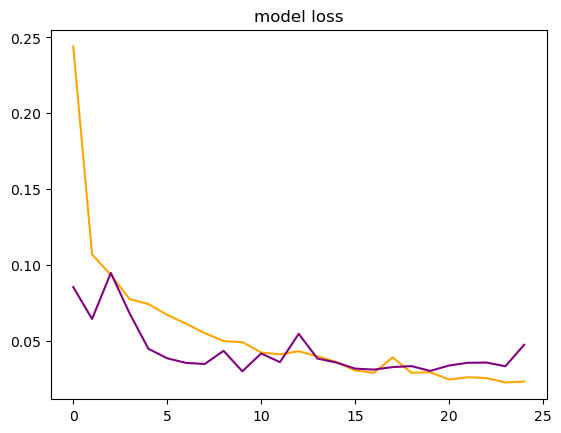

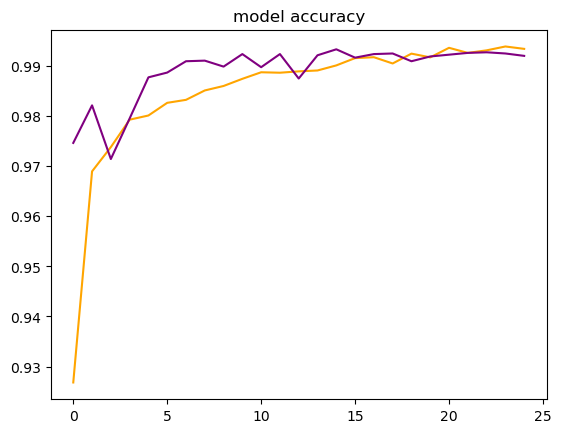

In [30]:
plt.plot(history.history['loss'], color='orange')
plt.plot(history.history['val_loss'], color='purple')
plt.title("model loss")
plt.show()
plt.plot(history.history['accuracy'], color='orange')
plt.plot(history.history['val_accuracy'], color="purple")
plt.title("model accuracy")
plt.show()

利用混淆矩陣觀察validation data

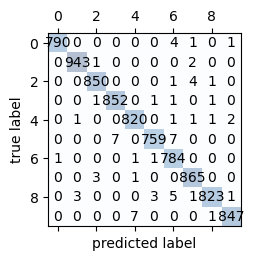

In [38]:
from sklearn.metrics import confusion_matrix
validation_predictions = model.predict(test_images_3, batch_size=32)
validation_predictions = np.argmax(validation_predictions, axis=1)
cm = confusion_matrix(test_labels, validation_predictions)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i,j], va='center', ha='center')
plt.xlabel('predicted label')        
plt.ylabel('true label')
plt.show()

計算validation data的precision、recall、F1數值進行觀察

In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score
val_precision = precision_score(test_labels, validation_predictions, average="weighted")
val_recall = recall_score(test_labels, validation_predictions, average="weighted")
val_f1 = f1_score(test_labels, validation_predictions, average="weighted")
print("Precision：", val_precision)
print("Recall：", val_recall)
print("f1 score：", val_f1)

Precision： 0.9920664174001402
Recall： 0.9920238095238095
f1 score： 0.9920267219377373


### 產出競賽要求的檔案格式
對訓練集資料做一樣的前處理

In [31]:
test_data_2 = test_data.copy(deep=True)
test_data_2 = test_data_2.values.reshape(-1, 28, 28, 1)
test_data_2 = test_data_2.astype("float32")/255

產生預測值，這邊可以注意一下，predict()產生的是預測機率，還要加上np.argnax()回傳預測機率最大的label

In [32]:
value_predictions = model.predict(test_data_2, batch_size=32)
label_predictions = np.argmax(value_predictions, axis=1)
label_predictions

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

匯出預測資料

In [67]:
df = pd.DataFrame(label_predictions)
df.index.name = "ImageId" 
df.index+=1
df.columns=["Label"]
df.to_csv('./results_2.csv', header=True)

## 競賽結果
上傳至kaggle之後的結果
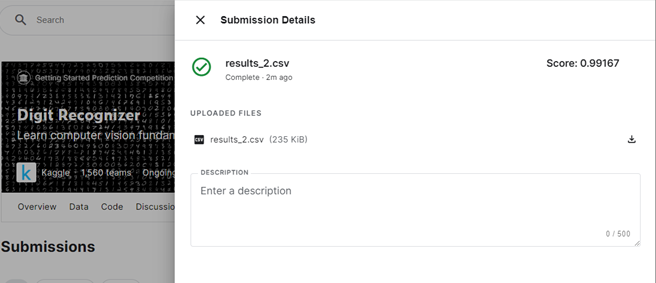

## 跟上課內容的關聯性
雖然這個題目是和電腦視覺較相關，去對數字圖片進行分類，看似與上課所學的房價和鐵達尼號數值預測較無關係，但其實上課內容幫助了我許多。主要有關連的部分是資料處理的部分，上課中我們學到許多pandas和numpy的套件方法，像是讀取csv檔、dataframe資料取得、預測的產出(predict(())、matplotlib的繪圖等等，讓我在資料處理觀察資料上更加得心應手。
除此之外，課程後段提到的混淆矩陣和precision、recall值等模型評估指標也讓我能更有效地評估模型的好壞，避免產生type1 error或type 2 error

## 延伸學習了那些
該報告中我者要延伸學習了影像處理相關的機器學習和深度學習，讓我得知原來照片也是由許多數字組成，處理照片其實也是在處理數值。過程我還學到圖片會使用到的前處理法、圖片放入模型前的前置步驟、模型的刻劃建置、訓練計畫的設定等等。值得一提的是我還了解到tensorflow環境的設置，各套件版本相容性、顯卡驅動的版本、對應版本的安裝都是要注意的。

## 比賽結果說明
最好產生出來的準確度是0.99167，排名在1560名參加者的376名，對我來說是一個不錯的名次，但我更加在意的是我有沒有從過程中學到機器學習相關知識，我認為自己是有的。
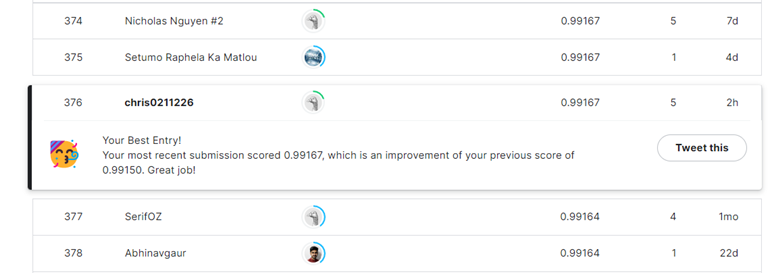

## 推測有哪些改善方式
我認為改善預測結果方式有以下幾種：
1. 照片的前處理：利用data augumation、調整亮度、更改色彩等調整原圖pixel value資訊
2. 模型架構：重新規劃其他架構的模型，找出更適合的架構
3. 訓練計畫：選擇其他的loss function和優化演算法進行模型訓練

## 不同的嘗試與結果分析
在利用SVM預測數字時，我發現用原圖和把pixel value除以255的預測準確度是差不多的，但如果把pixel value只設為0或1，準確度會下降，或許是因此導致資料的多元性下降，無法讓模型更有效了解training data。
在CNN模型訓練時，我曾嘗試使用ImageDataGenerator方式訓練模型，但該方法目前似乎已經不支援了，所以我使用model.fit()

## 參考資源
1. [%matplotlib inline](https://blog.csdn.net/leowinbow/article/details/86574159)
2. [one hot encoding](https://blog.csdn.net/moyu123456789/article/details/83444140)
3. [iloc()用法(重要!)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html)
4. [reshape()](https://ithelp.ithome.com.tw/articles/10195830)
5. [前處理為何將pixel除以255?](https://stackoverflow.com/questions/57454271/should-i-still-normalize-image-data-divide-by-255-before-using-per-image-stand)
6. [利用sequential()建造model](https://cloud.tencent.com/developer/article/1454168)
7. [SVM介紹](https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC3-4%E8%AC%9B-%E6%94%AF%E6%8F%B4%E5%90%91%E9%87%8F%E6%A9%9F-support-vector-machine-%E4%BB%8B%E7%B4%B9-9c6c6925856b)
8. [CNN介紹](https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC5-1%E8%AC%9B-%E5%8D%B7%E7%A9%8D%E7%A5%9E%E7%B6%93%E7%B6%B2%E7%B5%A1%E4%BB%8B%E7%B4%B9-convolutional-neural-network-4f8249d65d4f)
9. [Digit Recognizer](https://www.kaggle.com/competitions/digit-recognizer)
10. [模型指標](https://blog.csdn.net/weixin_39450145/article/details/115284725)